# Read Data

In [1]:
import pandas as pd
A = pd.read_csv("E:/Data Science/NN Mini Project 2/HR-Employee-Attrition-Table 1.csv")

In [2]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Checking missing data available

In [3]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Checking for unique data

In [4]:
for i in A.columns:
    print("\n")
    print(A[i].value_counts())



0    1233
1     237
Name: Attrition, dtype: int64


35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27


# Removing unwanted columns

In [5]:
A.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [6]:
A.EmployeeNumber.value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [7]:
A.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [8]:
A.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [9]:
A.shape

(1470, 35)

In [10]:
A = A.drop(labels=["Over18","EmployeeNumber","EmployeeCount","StandardHours"],axis=1)

In [11]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Create new/derived predictors (e.g. Age group) for analysis

In [12]:
age_group = []
for i in A.Age:
    if i>=18 and i<25:
        age_group.append("Gen Z")
    
    elif i>=25 and i<35:
        age_group.append("Millenials")
    
    elif i>=35 and i<55:
        age_group.append("Gen X")
        
    else:
        age_group.append("Baby boomers")

In [13]:
A["AgeGroup"] = age_group

In [14]:
A.AgeGroup.value_counts()

Gen X           750
Millenials      554
Gen Z            97
Baby boomers     69
Name: AgeGroup, dtype: int64

# Some variables are continuous but they are categorical in nature. So convert them to categorical.

In [15]:
from ml_functions import Missing_data
md = Missing_data()

In [16]:
cat, con = md.catconsep(A)

In [17]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'AgeGroup']

In [18]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
A[["Attrition"]].value_counts()

Attrition
0            1233
1             237
dtype: int64

In [20]:
A[["Education"]].value_counts()

Education
3            572
4            398
2            282
1            170
5             48
dtype: int64

In [21]:
A[["EnvironmentSatisfaction"]].value_counts()

EnvironmentSatisfaction
3                          453
4                          446
2                          287
1                          284
dtype: int64

In [22]:
A[["JobInvolvement"]].value_counts()

JobInvolvement
3                 868
2                 375
4                 144
1                  83
dtype: int64

In [23]:
A[["JobLevel"]].value_counts()

JobLevel
1           543
2           534
3           218
4           106
5            69
dtype: int64

In [24]:
A[["JobSatisfaction"]].value_counts()

JobSatisfaction
4                  459
3                  442
1                  289
2                  280
dtype: int64

In [25]:
A[["PerformanceRating"]].value_counts()

PerformanceRating
3                    1244
4                     226
dtype: int64

In [26]:
A[["RelationshipSatisfaction"]].value_counts()

RelationshipSatisfaction
3                           459
4                           432
2                           303
1                           276
dtype: int64

In [27]:
A[["StockOptionLevel"]].value_counts()

StockOptionLevel
0                   631
1                   596
2                   158
3                    85
dtype: int64

In [28]:
A[["WorkLifeBalance"]].value_counts()

WorkLifeBalance
3                  893
2                  344
4                  153
1                   80
dtype: int64

In [29]:
cat.append("Attrition")
cat.append("Education")
cat.append("EnvironmentSatisfaction")
cat.append("JobInvolvement")
cat.append("JobLevel")
cat.append("JobSatisfaction")
cat.append("PerformanceRating")
cat.append("RelationshipSatisfaction")
cat.append("StockOptionLevel")
cat.append("WorkLifeBalance")

In [30]:
con.remove("Attrition")
con.remove("Education")
con.remove("EnvironmentSatisfaction")
con.remove("JobInvolvement")
con.remove("JobLevel")
con.remove("JobSatisfaction")
con.remove("PerformanceRating")
con.remove("RelationshipSatisfaction")
con.remove("StockOptionLevel")
con.remove("WorkLifeBalance")

In [31]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'AgeGroup',
 'Attrition',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [32]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [33]:
def type_converter(df):
    con_list = []
    df_fin = df.columns[0]
    for i in df[df_fin]:
        con_list.append(str(i))
    A[df_fin] = con_list

In [34]:
type_converter(A[["Attrition"]])
type_converter(A[["Education"]])
type_converter(A[["EnvironmentSatisfaction"]])
type_converter(A[["JobInvolvement"]])
type_converter(A[["JobLevel"]])
type_converter(A[["JobSatisfaction"]])
type_converter(A[["PerformanceRating"]])
type_converter(A[["RelationshipSatisfaction"]])
type_converter(A[["StockOptionLevel"]])
type_converter(A[["WorkLifeBalance"]])

In [35]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Gen X
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Gen X
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Gen X
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Millenials
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Millenials


# 1) Perform Regression treating Monthly Rate as Y, and choose prediction error and the best model

# Declare X and Y

In [36]:
X = A.drop(labels=["MonthlyRate"],axis=1)
Y = A[["MonthlyRate"]]

# Seperate categorical and continuous of X 

In [37]:
cat, con = md.catconsep(X)

In [38]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'AgeGroup']

In [39]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# EDA(Exploratory Data Analysis)

In [40]:
from ml_functions import EDA
eda  = EDA()

# a) Univariant Analysis

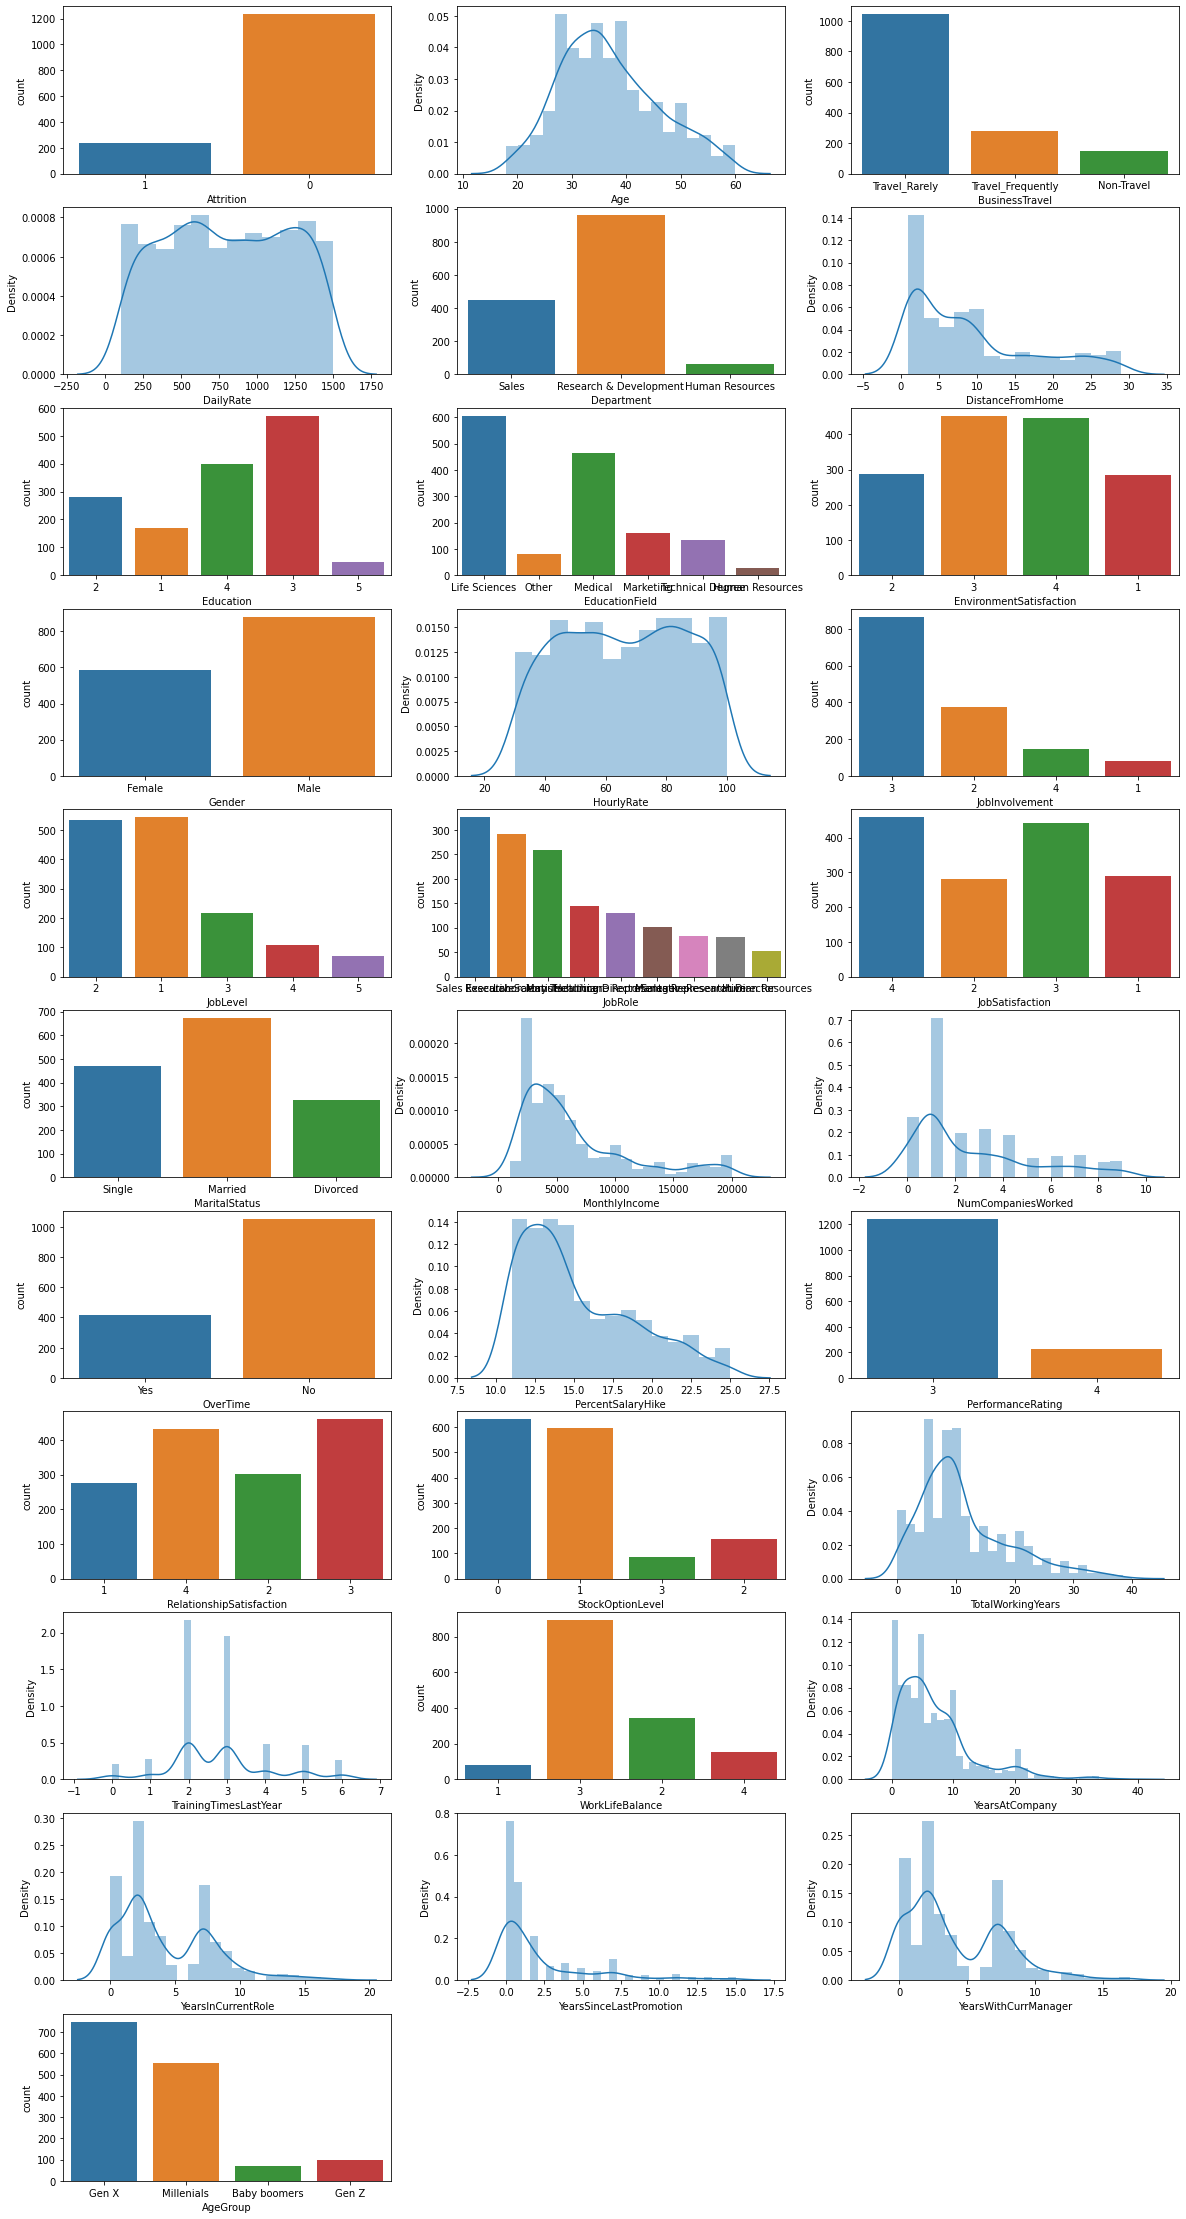

In [41]:
eda.univariate(X,cat,con)

# b) Bivariant Analysis

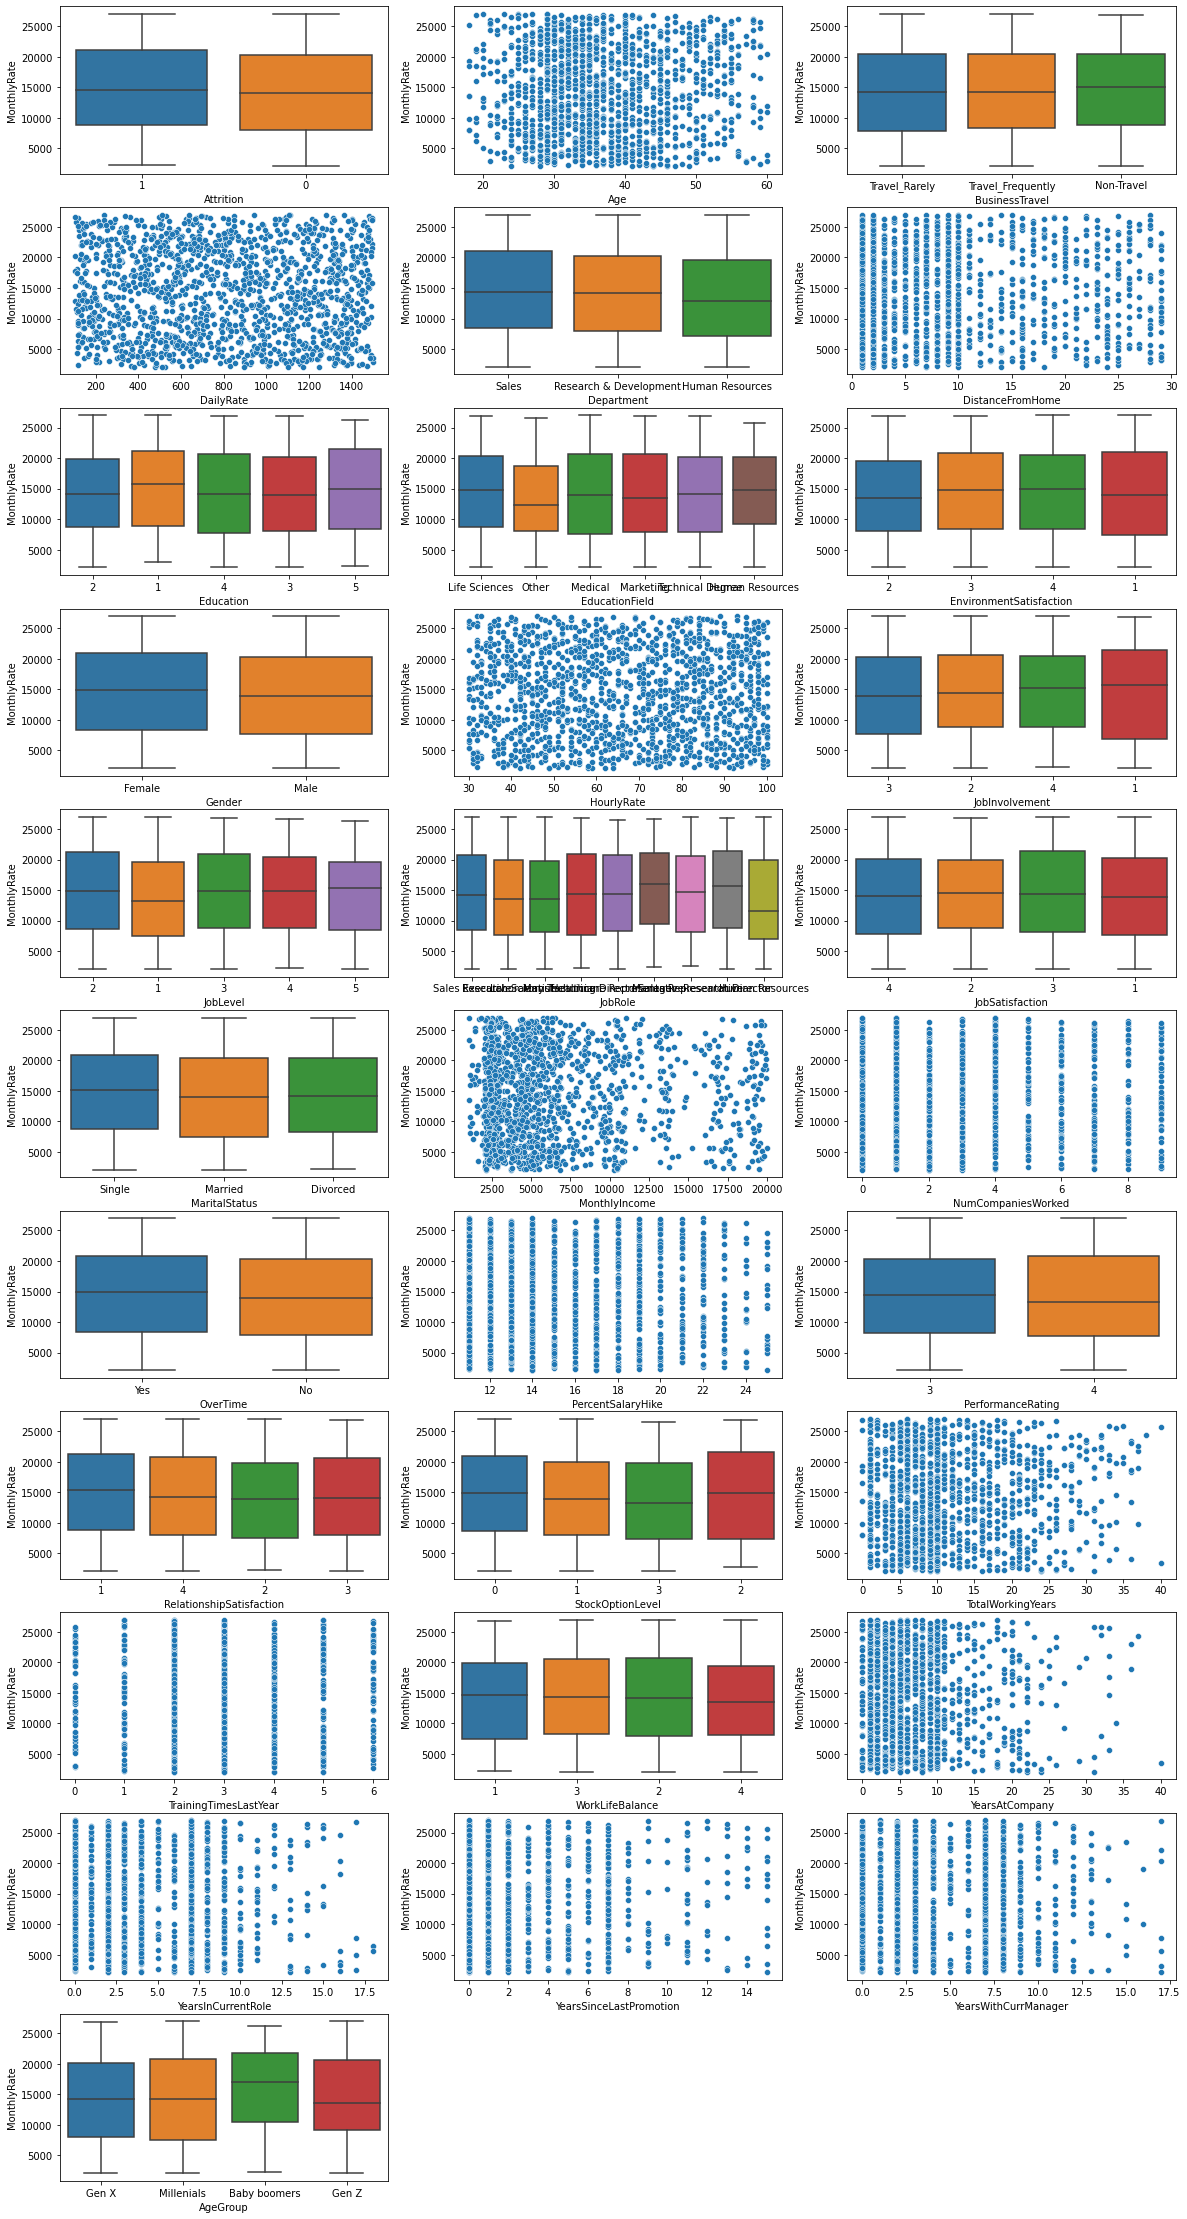

In [42]:
eda.bivariate_ycon(X,Y,cat,con)

# Data Preprocessing

# Checking Skew in continuous data and removing skew

In [43]:
X[con].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

In [44]:
from numpy import sqrt, log
X.MonthlyIncome = log(X.MonthlyIncome)
X.NumCompaniesWorked = sqrt(X.NumCompaniesWorked)
X.TotalWorkingYears = sqrt(X.TotalWorkingYears)
X.YearsAtCompany = sqrt(X.YearsAtCompany)
X.YearsSinceLastPromotion = sqrt(X.YearsSinceLastPromotion)
X.DistanceFromHome = log(X.DistanceFromHome)
X.PercentSalaryHike = log(X.PercentSalaryHike)
X.YearsInCurrentRole = sqrt(X.YearsInCurrentRole)
X.YearsWithCurrManager = sqrt(X.YearsWithCurrManager)

In [45]:
X[con].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome          -0.246004
HourlyRate                -0.032311
MonthlyIncome              0.286192
NumCompaniesWorked         0.031303
PercentSalaryHike          0.494566
TotalWorkingYears          0.176358
TrainingTimesLastYear      0.553124
YearsAtCompany             0.426835
YearsInCurrentRole        -0.254344
YearsSinceLastPromotion    0.739126
YearsWithCurrManager      -0.254611
dtype: float64

# Data Preprocessing

In [46]:
X = md.preprocessing(X)

In [47]:
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,AgeGroup_Baby boomers,AgeGroup_Gen X,AgeGroup_Gen Z,AgeGroup_Millenials
0,0.446350,0.742527,-1.644714,1.383138,0.219553,1.705907,-1.302367,-0.278944,-2.171982,0.040574,...,0,0,1,0,0,0,0,1,0,0
1,1.322365,-1.297775,0.317324,-0.240677,-0.014535,-0.504638,1.930646,0.008926,0.155707,0.684253,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.990702,1.284725,-1.366400,1.247776,0.057091,-0.436461,0.155707,-2.171423,...,0,0,0,0,1,0,0,1,0,0
3,-0.429664,1.461466,-0.608129,-0.486709,-0.868608,-0.504638,-1.302367,-0.278944,0.155707,0.382771,...,0,0,0,0,1,0,0,0,0,1
4,-1.086676,-0.524295,-0.990702,-1.274014,-0.603985,1.913336,-0.920982,-0.605693,0.155707,-0.894326,...,0,0,0,0,1,0,0,0,0,1


In [48]:
Y.head()

,MonthlyRate
0,19479
1,24907
2,2396
3,23159
4,16632


# Split data into training and testing

In [49]:
from ml_functions import Data_split
ds = Data_split()
xtrain,xtest,ytrain,ytest = ds.train_test(X,Y,32)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
import tensorflow as tf

# Find best params using keras tunner

In [51]:
def model_builder1(hp):
    
    tuning_grid = [0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45]
    
    model = Sequential()
    
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    
    HLS1 = hp.Int("units1", min_value=30, max_value=400, step=5)
    model.add(Dense(units=HLS1,activation="relu"))
    
    DROPOUT_LAYER_RATE1 = hp.Choice("rate1",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE1))
    
    HLS2 = hp.Int("units2", min_value=30, max_value=400, step=10)
    model.add(Dense(units=HLS2,activation="relu"))
    
    DROPOUT_LAYER_RATE2 = hp.Choice("rate2",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE2))
    
    HLS3 = hp.Int("units3", min_value=30, max_value=400, step=10)
    model.add(Dense(units=HLS3,activation="relu"))
    
    DROPOUT_LAYER_RATE3 = hp.Choice("rate3",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE3))
    
    model.add(Dense(1))
    
    model.compile(loss="mean_absolute_error",metrics=["mae"],optimizer="Adam")
    
    return model

In [52]:
import os
os.chdir("E:/Data Science/Dummy/")

In [53]:
tuner1 = kt.Hyperband(model_builder1,
                     objective='val_mae',
                     max_epochs=10,
                     directory="hr1_24",
                     project_name="hr1_24")

In [54]:
tuner1.search(xtrain,ytrain,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_mae: 6632.94189453125

Best val_mae So Far: 6632.94189453125
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


In [55]:
print("Hidden Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units1"))
print("Dropout Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate1"))
print("Hidden Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units2"))
print("Dropout Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate2"))
print("Hidden Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units3"))
print("Dropout Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate3"))

Hidden Layer 1:  60
Dropout Layer 1:  0.13
Hidden Layer 2:  280
Dropout Layer 2:  0.1
Hidden Layer 3:  240
Dropout Layer 3:  0.43


# Create Neural Network using best param of tuner1

In [56]:
nn1 = Sequential()

nn1.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))

nn1.add(Dense(60))
nn1.add(Dropout(0.13))

nn1.add(Dense(280,activation="relu"))
nn1.add(Dropout(0.1))

nn1.add(Dense(240,activation="relu"))
nn1.add(Dropout(0.43))


nn1.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=50,monitor="mae")

nn1.compile(optimizer="Adam",loss="mean_absolute_error",metrics=["mae"])
nn1.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=600)

Epoch 1/600
30/30 [==============================] - 0s 15ms/step - loss: 14307.1514 - mae: 14307.1514 - val_loss: 13761.4170 - val_mae: 13761.4170
Epoch 2/600
30/30 [==============================] - 0s 5ms/step - loss: 11006.3652 - mae: 11006.3652 - val_loss: 6656.2500 - val_mae: 6656.2500
Epoch 3/600
30/30 [==============================] - 0s 6ms/step - loss: 6179.6431 - mae: 6179.6431 - val_loss: 6681.0312 - val_mae: 6681.0312
Epoch 4/600
30/30 [==============================] - 0s 6ms/step - loss: 6025.1841 - mae: 6025.1841 - val_loss: 6757.3647 - val_mae: 6757.3647
Epoch 5/600
30/30 [==============================] - 0s 6ms/step - loss: 5979.7559 - mae: 5979.7559 - val_loss: 6838.8516 - val_mae: 6838.8516
Epoch 6/600
30/30 [==============================] - 0s 5ms/step - loss: 5907.4424 - mae: 5907.4424 - val_loss: 6846.7017 - val_mae: 6846.7017
Epoch 7/600
30/30 [==============================] - 0s 5ms/step - loss: 5900.8462 - mae: 5900.8462 - val_loss: 6868.1084 - val_mae: 68

Epoch 58/600
30/30 [==============================] - 0s 6ms/step - loss: 4152.4229 - mae: 4152.4229 - val_loss: 7538.6558 - val_mae: 7538.6558
Epoch 59/600
30/30 [==============================] - 0s 6ms/step - loss: 4214.0342 - mae: 4214.0342 - val_loss: 7476.2554 - val_mae: 7476.2554
Epoch 60/600
30/30 [==============================] - 0s 5ms/step - loss: 4024.2825 - mae: 4024.2825 - val_loss: 7378.2671 - val_mae: 7378.2671
Epoch 61/600
30/30 [==============================] - 0s 6ms/step - loss: 4024.9102 - mae: 4024.9102 - val_loss: 7565.9399 - val_mae: 7565.9399
Epoch 62/600
30/30 [==============================] - 0s 6ms/step - loss: 3983.0383 - mae: 3983.0383 - val_loss: 7451.0278 - val_mae: 7451.0278
Epoch 63/600
30/30 [==============================] - 0s 6ms/step - loss: 3860.7368 - mae: 3860.7368 - val_loss: 7552.7446 - val_mae: 7552.7446
Epoch 64/600
30/30 [==============================] - 0s 6ms/step - loss: 3865.3203 - mae: 3865.3203 - val_loss: 7570.4009 - val_mae: 75

Epoch 115/600
30/30 [==============================] - 0s 5ms/step - loss: 2069.2156 - mae: 2069.2156 - val_loss: 8261.7041 - val_mae: 8261.7041
Epoch 116/600
30/30 [==============================] - 0s 5ms/step - loss: 1945.5977 - mae: 1945.5977 - val_loss: 8423.7852 - val_mae: 8423.7852
Epoch 117/600
30/30 [==============================] - 0s 7ms/step - loss: 2023.4181 - mae: 2023.4181 - val_loss: 8268.0195 - val_mae: 8268.0195
Epoch 118/600
30/30 [==============================] - 0s 7ms/step - loss: 1914.6265 - mae: 1914.6265 - val_loss: 8211.3047 - val_mae: 8211.3047
Epoch 119/600
30/30 [==============================] - 0s 6ms/step - loss: 1926.5626 - mae: 1926.5626 - val_loss: 8344.4834 - val_mae: 8344.4834
Epoch 120/600
30/30 [==============================] - 0s 5ms/step - loss: 1996.9327 - mae: 1996.9327 - val_loss: 8222.9775 - val_mae: 8222.9775
Epoch 121/600
30/30 [==============================] - 0s 6ms/step - loss: 1894.8077 - mae: 1894.8077 - val_loss: 8208.1943 - val_

30/30 [==============================] - 0s 5ms/step - loss: 1531.1948 - mae: 1531.1948 - val_loss: 8318.2676 - val_mae: 8318.2676
Epoch 172/600
30/30 [==============================] - 0s 5ms/step - loss: 1479.6144 - mae: 1479.6144 - val_loss: 8359.6924 - val_mae: 8359.6924
Epoch 173/600
30/30 [==============================] - 0s 5ms/step - loss: 1541.4473 - mae: 1541.4473 - val_loss: 8269.5664 - val_mae: 8269.5664
Epoch 174/600
30/30 [==============================] - 0s 5ms/step - loss: 1484.2396 - mae: 1484.2396 - val_loss: 8343.4346 - val_mae: 8343.4346
Epoch 175/600
30/30 [==============================] - 0s 5ms/step - loss: 1516.7542 - mae: 1516.7542 - val_loss: 8470.3613 - val_mae: 8470.3613
Epoch 176/600
30/30 [==============================] - 0s 6ms/step - loss: 1557.9642 - mae: 1557.9642 - val_loss: 8349.1094 - val_mae: 8349.1094
Epoch 177/600
30/30 [==============================] - 0s 5ms/step - loss: 1532.7271 - mae: 1532.7271 - val_loss: 8334.4062 - val_mae: 8334.4062

30/30 [==============================] - 0s 6ms/step - loss: 1410.0026 - mae: 1410.0026 - val_loss: 8345.0195 - val_mae: 8345.0195
Epoch 228/600
30/30 [==============================] - 0s 6ms/step - loss: 1395.3069 - mae: 1395.3069 - val_loss: 8258.7178 - val_mae: 8258.7178
Epoch 229/600
30/30 [==============================] - 0s 6ms/step - loss: 1366.6453 - mae: 1366.6453 - val_loss: 8442.7324 - val_mae: 8442.7324
Epoch 230/600
30/30 [==============================] - 0s 6ms/step - loss: 1422.8542 - mae: 1422.8542 - val_loss: 8392.5049 - val_mae: 8392.5049
Epoch 231/600
30/30 [==============================] - 0s 5ms/step - loss: 1441.7385 - mae: 1441.7385 - val_loss: 8237.8086 - val_mae: 8237.8086
Epoch 232/600
30/30 [==============================] - 0s 6ms/step - loss: 1444.2556 - mae: 1444.2556 - val_loss: 8255.1680 - val_mae: 8255.1680
Epoch 233/600
30/30 [==============================] - 0s 6ms/step - loss: 1456.4584 - mae: 1456.4584 - val_loss: 8314.1025 - val_mae: 8314.1025

30/30 [==============================] - 0s 5ms/step - loss: 1422.0299 - mae: 1422.0299 - val_loss: 8480.8594 - val_mae: 8480.8594
Epoch 284/600
30/30 [==============================] - 0s 5ms/step - loss: 1374.8436 - mae: 1374.8436 - val_loss: 8344.4521 - val_mae: 8344.4521
Epoch 285/600
30/30 [==============================] - 0s 5ms/step - loss: 1319.0724 - mae: 1319.0724 - val_loss: 8366.6279 - val_mae: 8366.6279
Epoch 286/600
30/30 [==============================] - 0s 5ms/step - loss: 1338.5983 - mae: 1338.5983 - val_loss: 8423.5049 - val_mae: 8423.5049
Epoch 287/600
30/30 [==============================] - 0s 5ms/step - loss: 1331.1305 - mae: 1331.1305 - val_loss: 8398.8867 - val_mae: 8398.8867
Epoch 288/600
30/30 [==============================] - 0s 5ms/step - loss: 1356.5964 - mae: 1356.5964 - val_loss: 8262.6182 - val_mae: 8262.6182
Epoch 289/600
30/30 [==============================] - 0s 5ms/step - loss: 1404.0107 - mae: 1404.0107 - val_loss: 8291.1699 - val_mae: 8291.1699

# 2)Form Classification Model using Y=attrition and choose the best model

In [57]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Gen X
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Gen X
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Gen X
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Millenials
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Millenials


# Declare X and Y

In [58]:
X = A.drop(labels=["Attrition"],axis=1)
Y = A[["Attrition"]]

# Seperate categorical and continuous of X

In [59]:
cat, con = md.catconsep(X)

In [60]:
cat

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'AgeGroup']

In [61]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# EDA (Exploratory Data Analysis)

# Univariant

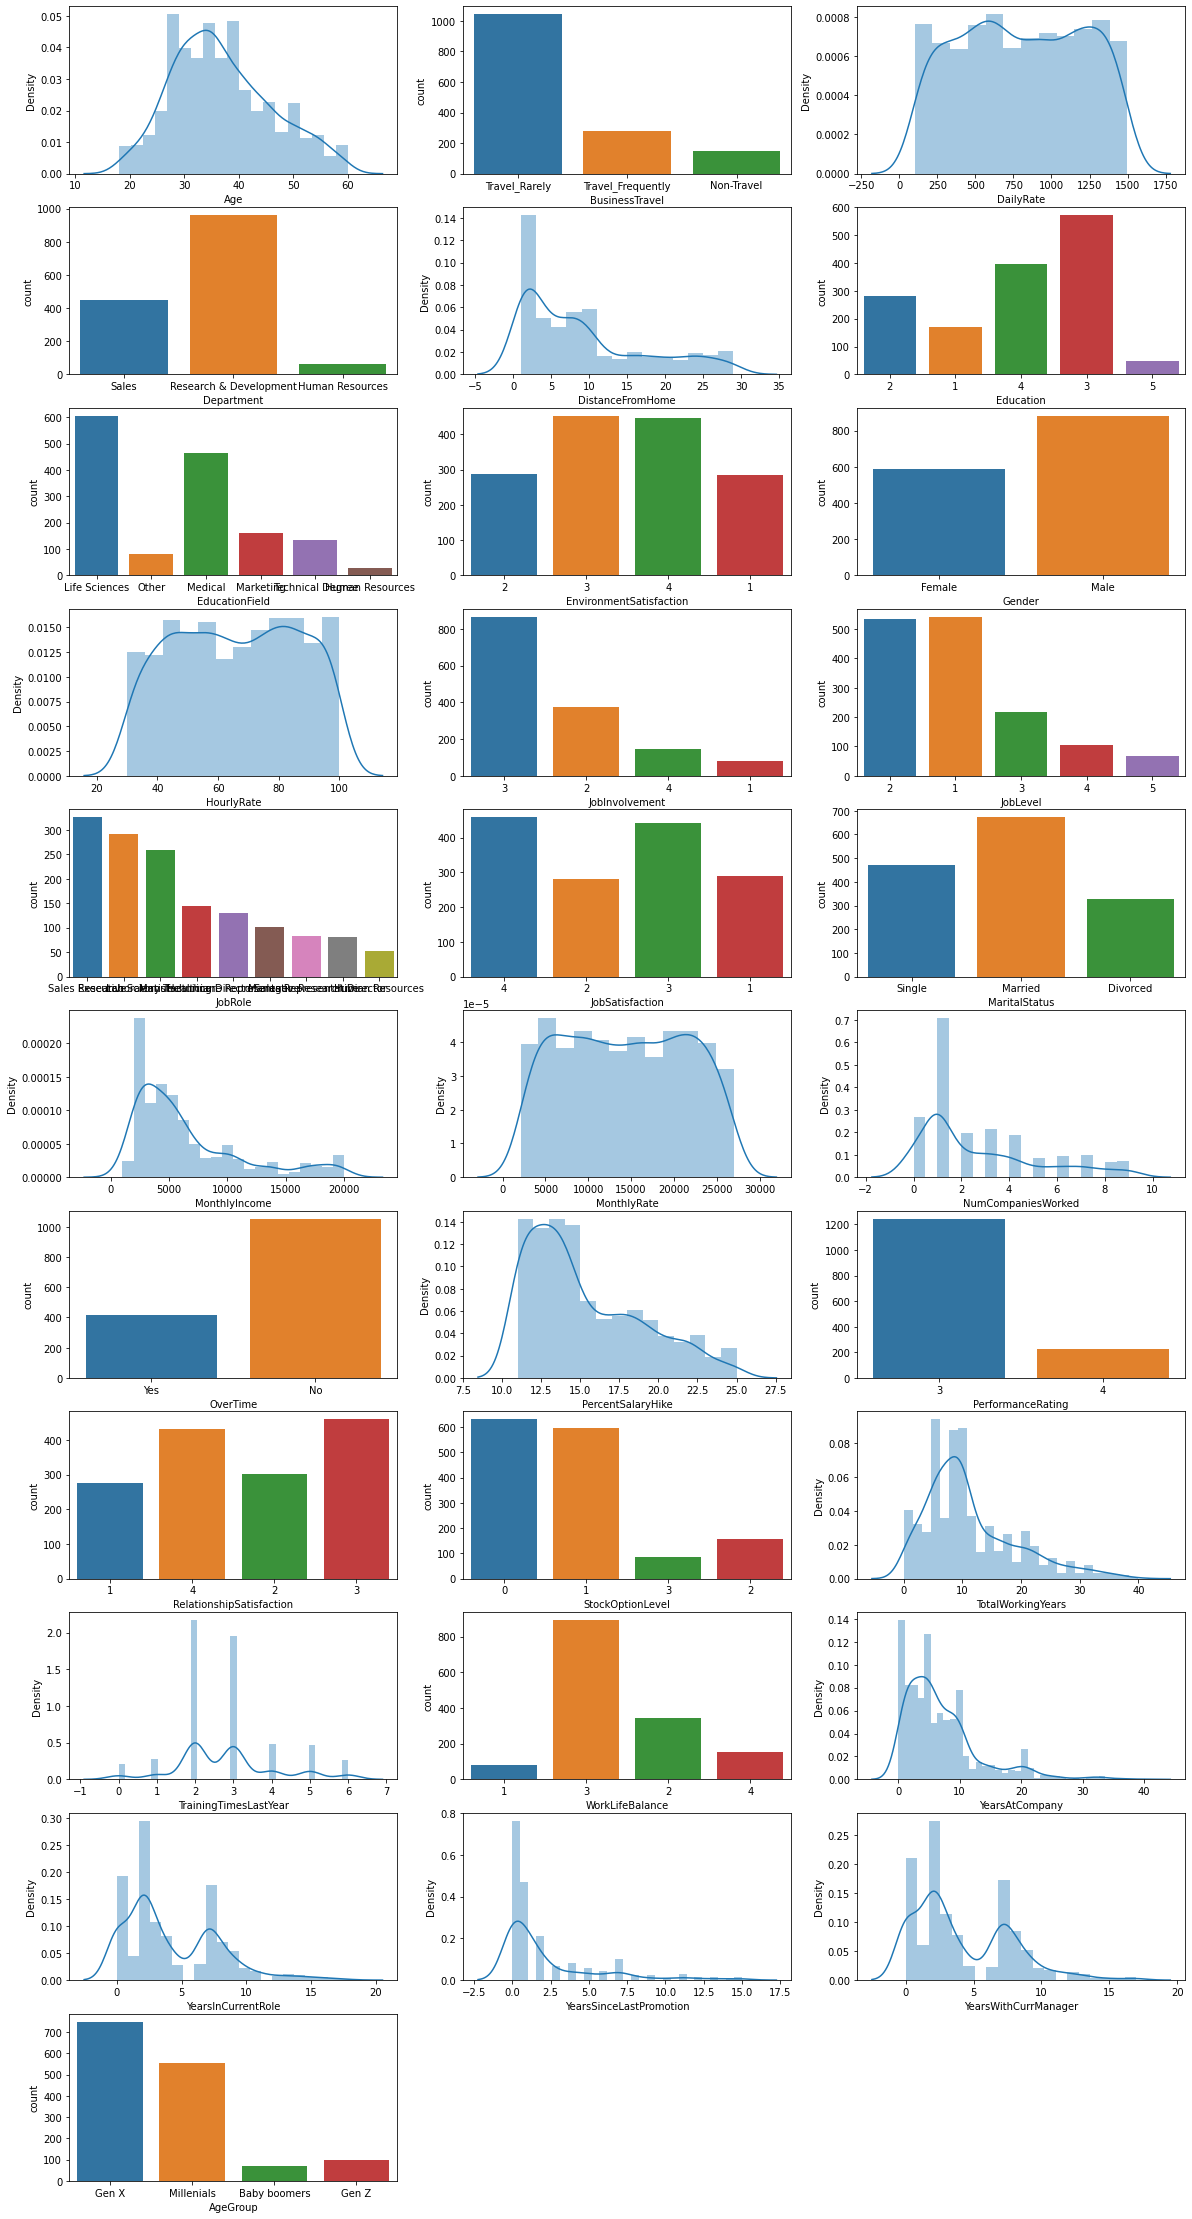

In [62]:
eda.univariate(X,cat,con)

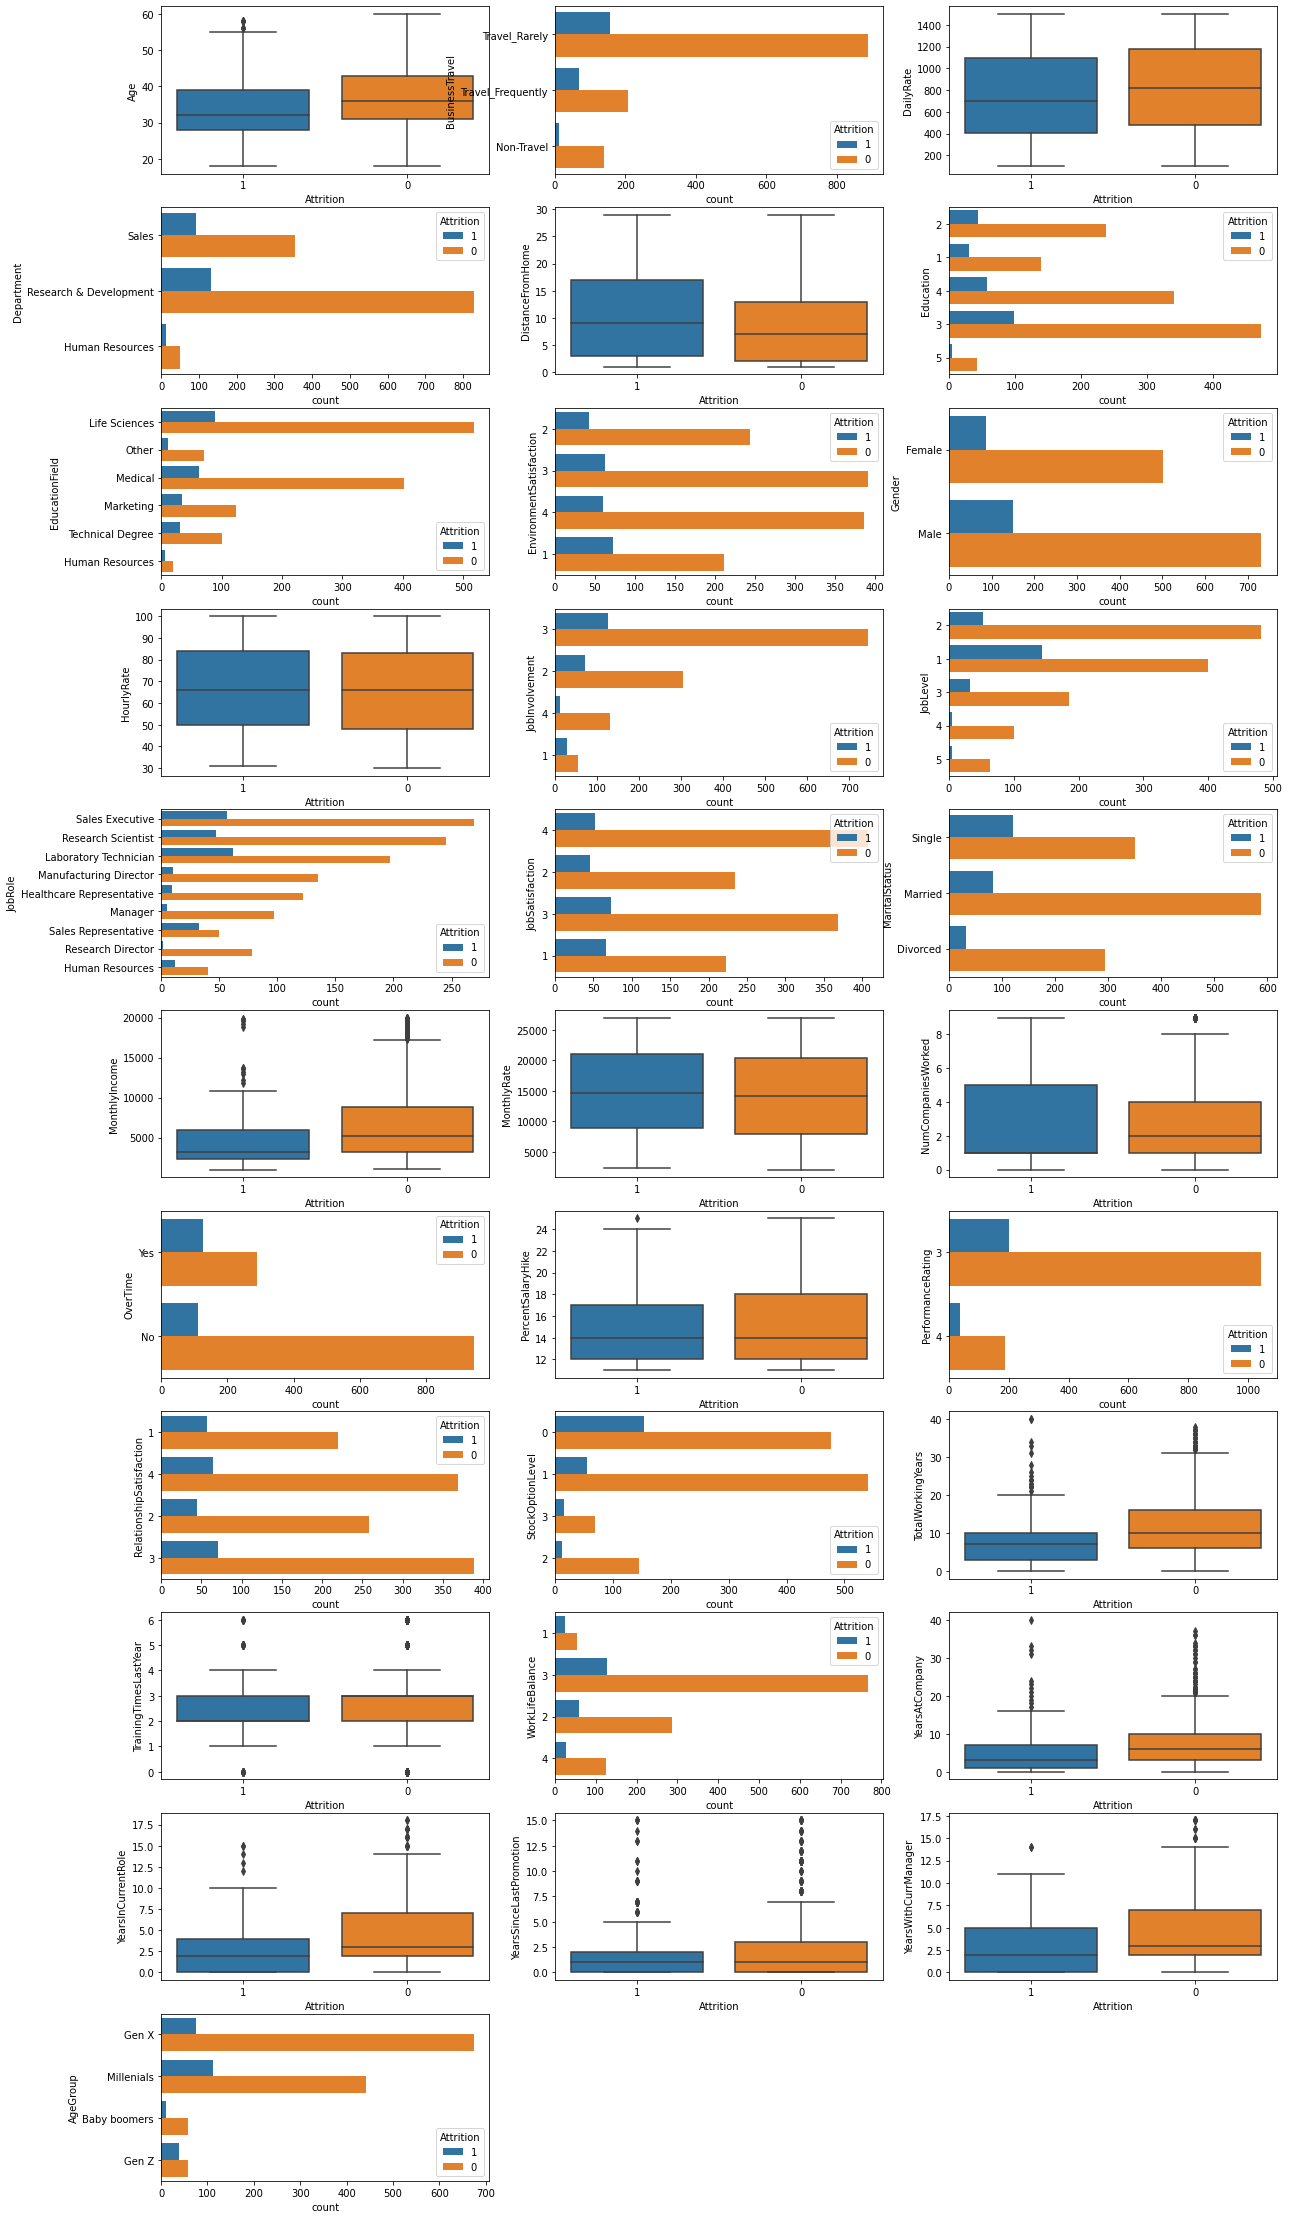

In [63]:
eda.bivariate_ycat(X,Y,cat,con)

# Data Preprocessing

# Checking skew in data and remove skew if any in the data

In [64]:
X[con].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

In [65]:
from numpy import sqrt, log
X.MonthlyIncome = log(X.MonthlyIncome)
X.NumCompaniesWorked = sqrt(X.NumCompaniesWorked)
X.TotalWorkingYears = sqrt(X.TotalWorkingYears)
X.YearsAtCompany = sqrt(X.YearsAtCompany)
X.YearsSinceLastPromotion = sqrt(X.YearsSinceLastPromotion)
X.DistanceFromHome = log(X.DistanceFromHome)
X.PercentSalaryHike = log(X.PercentSalaryHike)
X.YearsInCurrentRole = sqrt(X.YearsInCurrentRole)
X.YearsWithCurrManager = sqrt(X.YearsWithCurrManager)

In [66]:
X[con].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome          -0.246004
HourlyRate                -0.032311
MonthlyIncome              0.286192
MonthlyRate                0.018578
NumCompaniesWorked         0.031303
PercentSalaryHike          0.494566
TotalWorkingYears          0.176358
TrainingTimesLastYear      0.553124
YearsAtCompany             0.426835
YearsInCurrentRole        -0.254344
YearsSinceLastPromotion    0.739126
YearsWithCurrManager      -0.254611
dtype: float64

In [67]:
X = md.preprocessing(X)

In [68]:
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,AgeGroup_Baby boomers,AgeGroup_Gen X,AgeGroup_Gen Z,AgeGroup_Millenials
0,0.446350,0.742527,-1.644714,1.383138,0.219553,0.726020,1.705907,-1.302367,-0.278944,-2.171982,...,0,0,1,0,0,0,0,1,0,0
1,1.322365,-1.297775,0.317324,-0.240677,-0.014535,1.488876,-0.504638,1.930646,0.008926,0.155707,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.990702,1.284725,-1.366400,-1.674841,1.247776,0.057091,-0.436461,0.155707,...,0,0,0,0,1,0,0,1,0,0
3,-0.429664,1.461466,-0.608129,-0.486709,-0.868608,1.243211,-0.504638,-1.302367,-0.278944,0.155707,...,0,0,0,0,1,0,0,0,0,1
4,-1.086676,-0.524295,-0.990702,-1.274014,-0.603985,0.325900,1.913336,-0.920982,-0.605693,0.155707,...,0,0,0,0,1,0,0,0,0,1


# Convert Y by using LabelEncoder

In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
Y = pd.DataFrame(lb.fit_transform(Y),columns=["Attrition"])

# Divide data into training and testing set

In [70]:
xtrain,xtest,ytrain,ytest = ds.train_test(X,Y,32)

# Find best param using Keras Tunner

In [72]:
def model_maker_func(hp):
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    HLS = hp.Int("units", min_value=32, max_value=257, step=32)
    model.add(Dense(units=HLS))
    DROPOUT_LAYER_RATE = hp.Choice("rate",values=[0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45])
    model.add(Dropout(rate=DROPOUT_LAYER_RATE))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",metrics="accuracy")
    
    return model

In [73]:
import os
os.chdir("E:/Data Science/Dummy/")

In [74]:
tuner2 = kt.Hyperband(model_maker_func,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory="hrnn2_22",
                     project_name="hrnn22")

In [75]:
tuner2.search(xtrain,ytrain,validation_split=0.2)

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.8983050584793091

Best val_accuracy So Far: 0.9067796468734741
Total elapsed time: 00h 01m 37s
INFO:tensorflow:Oracle triggered exit


In [76]:
tuner2.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.4

In [77]:
tuner2.get_best_hyperparameters(num_trials=1)[0].get("units")

64

# Create neural network using best params

In [79]:
nn2 = Sequential()
nn2.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
nn2.add(Dense(64))
nn2.add(Dropout(0.4))
nn2.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=40,monitor="accuracy")

nn2.compile(optimizer="Adam",loss="binary_crossentropy",metrics="accuracy")
nn2.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=500)

Epoch 1/500
30/30 [==============================] - 0s 13ms/step - loss: 0.4719 - accuracy: 0.8202 - val_loss: 0.3558 - val_accuracy: 0.8729
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.8489 - val_loss: 0.3147 - val_accuracy: 0.8856
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8787 - val_loss: 0.2811 - val_accuracy: 0.8898
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8968 - val_loss: 0.2646 - val_accuracy: 0.9068
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9074 - val_loss: 0.2620 - val_accuracy: 0.8983
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9181 - val_loss: 0.2616 - val_accuracy: 0.9068
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9298 - val_loss: 0.2745 - val_accuracy: 0.8856
Epoch 8/500


30/30 [==============================] - 0s 3ms/step - loss: 6.9129e-04 - accuracy: 1.0000 - val_loss: 0.7292 - val_accuracy: 0.8941
Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 7.6637e-04 - accuracy: 1.0000 - val_loss: 0.7300 - val_accuracy: 0.8941
Epoch 60/500
30/30 [==============================] - 0s 3ms/step - loss: 5.8372e-04 - accuracy: 1.0000 - val_loss: 0.7341 - val_accuracy: 0.8898
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 6.9372e-04 - accuracy: 1.0000 - val_loss: 0.7351 - val_accuracy: 0.8856
